데이터 로드

In [12]:
import multiprocessing 
from multiprocessing import Pool 
from functools import partial 
from data_loader_v2 import data_loader_v2
import os 
import pandas as pd
import numpy as np
import joblib

train_folder = 'train/'
train_label_path = 'train_label.csv'

In [13]:
train_list = os.listdir(train_folder)
train_label = pd.read_csv(train_label_path, index_col=0)

In [14]:
def data_loader_all(func, files, folder='', train_label=None, event_time=15, nrows=75):   
    func_fixed = partial(func, folder=folder, train_label=train_label, event_time=event_time, nrows=nrows)  
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close() 
        pool.join() 
    combined_df = pd.concat(df_list)
    return combined_df

In [15]:
train = data_loader_all(data_loader_v2, train_list, folder=train_folder, train_label=train_label, event_time=15, nrows=75)

In [16]:
train=train.loc[:,train.std()!=0]

In [18]:
np.savez('train_ver3.npz', X=X_train, y=y_train)

In [17]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

In [13]:
X_train.shape, y_train.shape

((41350, 5121), (41350,))

In [15]:
np.savez('train_ver3.npz', X=X_train, y=y_train)

라벨 별 분포도 확인

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import itertools

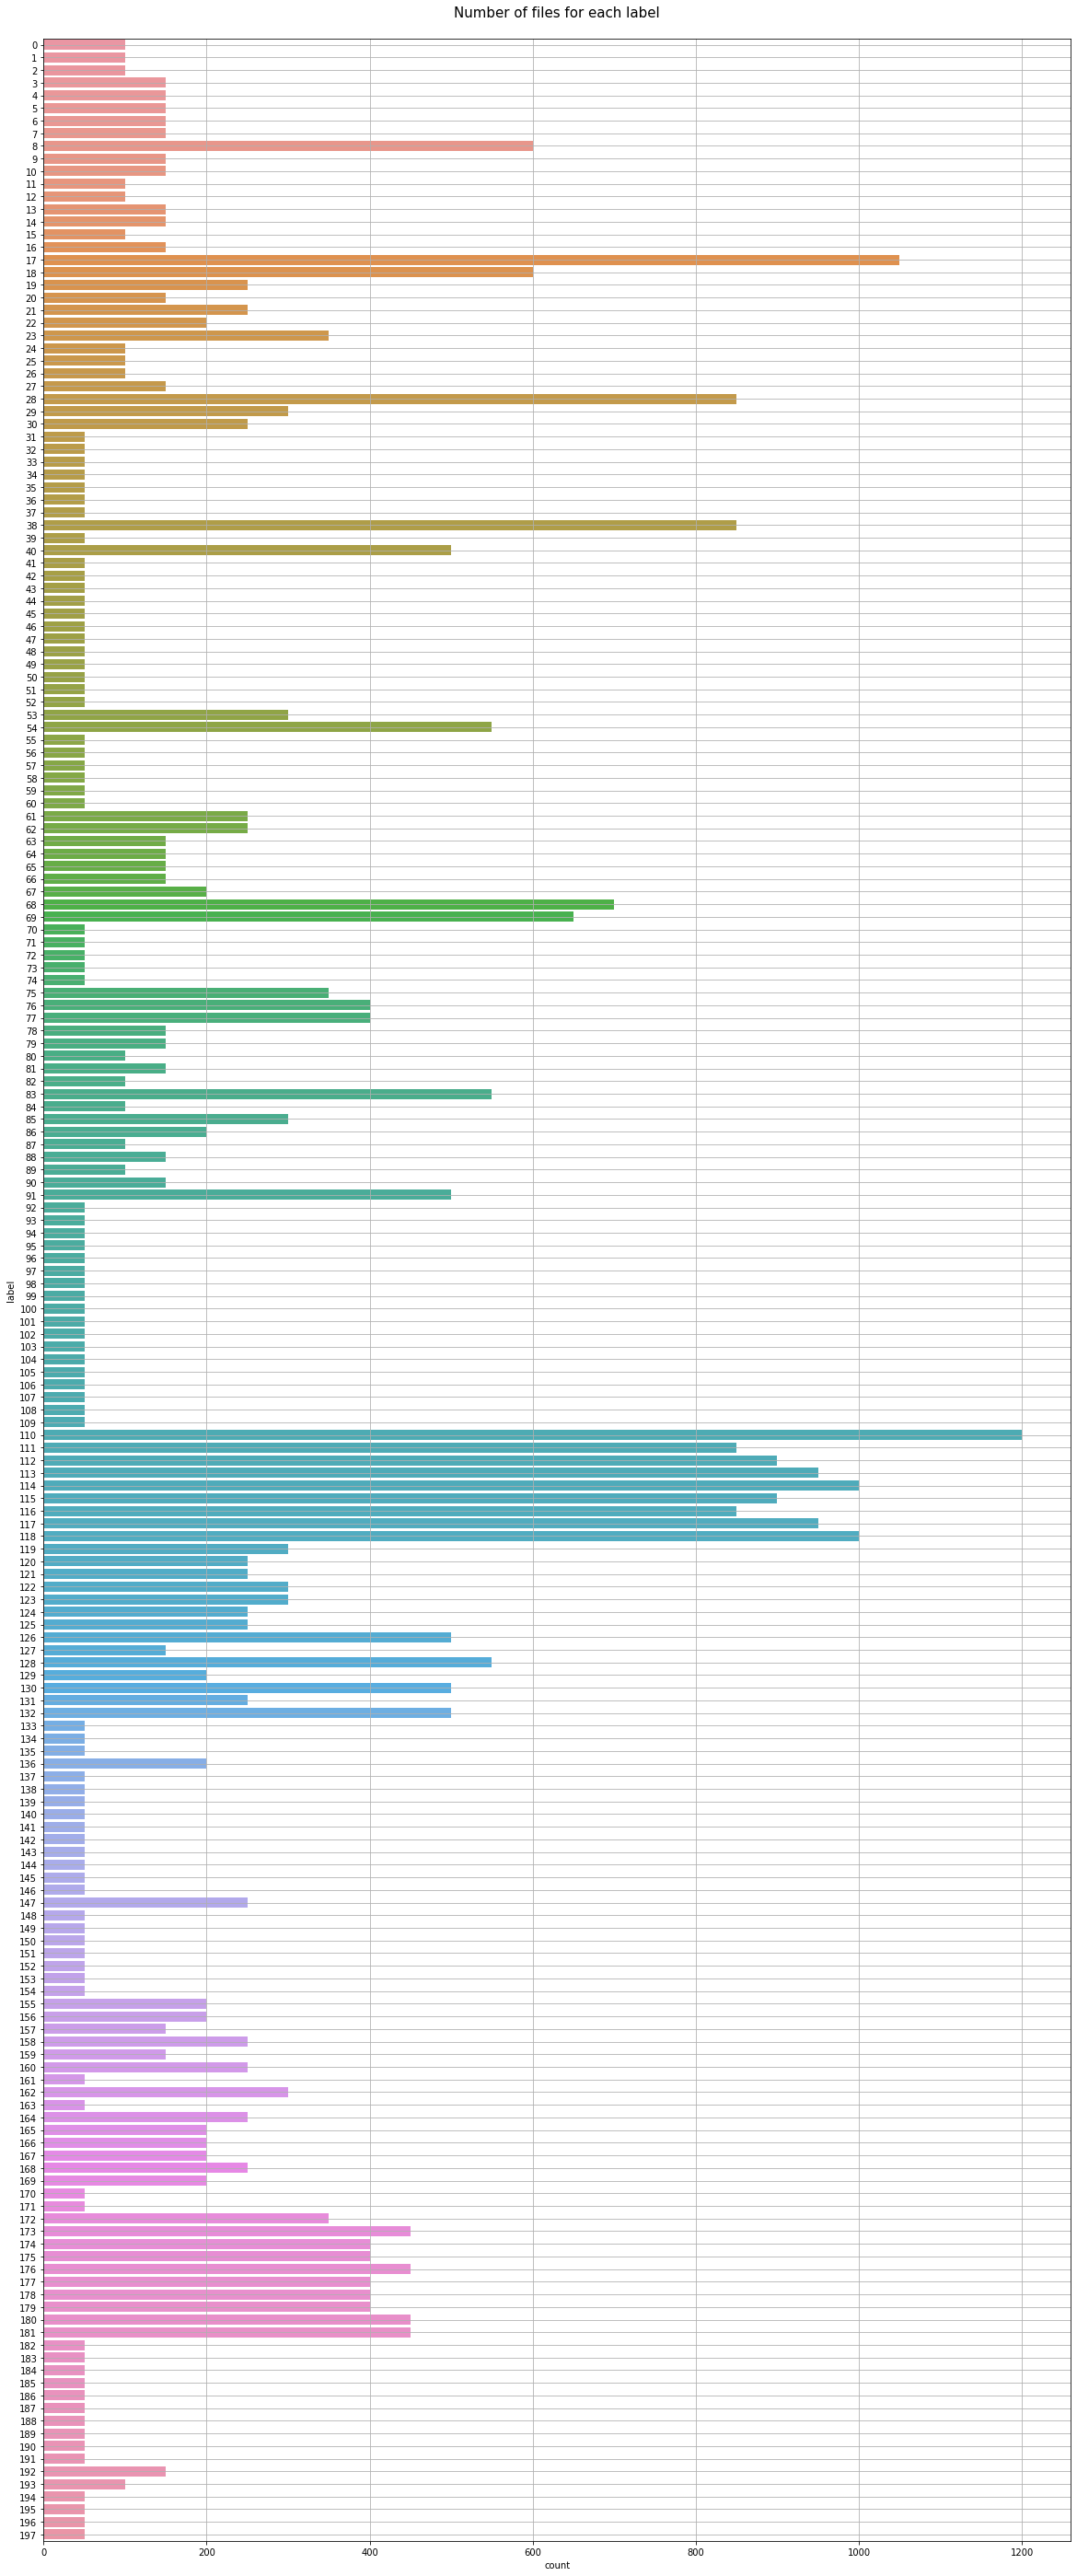

In [18]:
plt.figure(figsize=(20, 50))
sns.countplot(y=y_train)

plt.title('Number of files for each label\n', size=15)
plt.grid()

plt.show()

분산분석 - 110

In [65]:
train = np.load('train_ver0.npz')

In [66]:
X_train =train['X']
y_train = train['y']

In [67]:
list_110=[]
list_110=train_label.loc[train_label.label==110].index
train_list_test = [f'{i}.csv' for i in list_110]

In [70]:
train_110 = data_loader_all(data_loader_v2, train_list_test, folder=train_folder, train_label=None, event_time=15, nrows=100)

In [68]:
def data_loader_all(func, files, folder='', train_label=None, event_time=10, nrows=60):   
    func_fixed = partial(func, folder=folder, train_label=train_label, event_time=event_time, nrows=nrows)  
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close() 
        pool.join() 
    combined_df = pd.concat(df_list)
    return combined_df

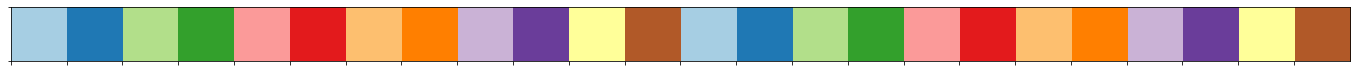

In [88]:
custom_palette = sns.color_palette("Paired", 24)
sns.palplot(custom_palette)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

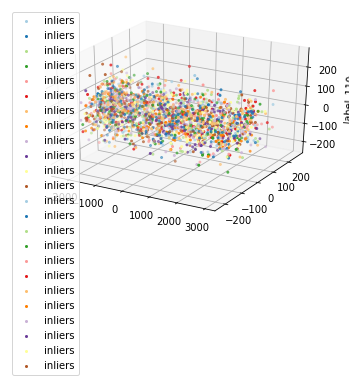

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("label_110")
for i in range(24):
    ax.scatter(data1[i][:, 0], data1[i][:, 1], zs=data1[i][:, 2], s=4, lw=1, label="inliers",c=custom_palette[i])

ax.legend()
plt.show()

In [78]:
X_reduce.shape

(2040, 3)

In [79]:
data1 = np.vsplit(X_reduce, 24) 

In [86]:
data1[0].shape

(85, 3)

In [92]:
data2 = np.vsplit(train_110, 24) 

In [106]:
len(data1[0])

85

In [109]:
from scipy.stats import f_oneway
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#fstat, pval = f_oneway(data1[0], data1[1], data1[2],data1[3], data1[4], data1[5])
# np.concatenate를 통해 데이터를 합쳐 놓는다.
#v = np.concatenate([data1[0], data1[1], data1[2],data1[3], data1[4], data1[5]])
# 사후 검정을 수행한다.
tukey_results = pairwise_tukeyhsd(X_reduce, 2040, 0.05)
print(tukey_results)

TypeError: object of type 'int' has no len()

리샘플링 - event_time = 15, nrows=200

In [21]:
from sklearn.model_selection import StratifiedKFold

In [23]:
skf = StratifiedKFold(n_splits=3)
skf.split(X_train, y_train)

<generator object _BaseKFold.split at 0x0000021D43719448>

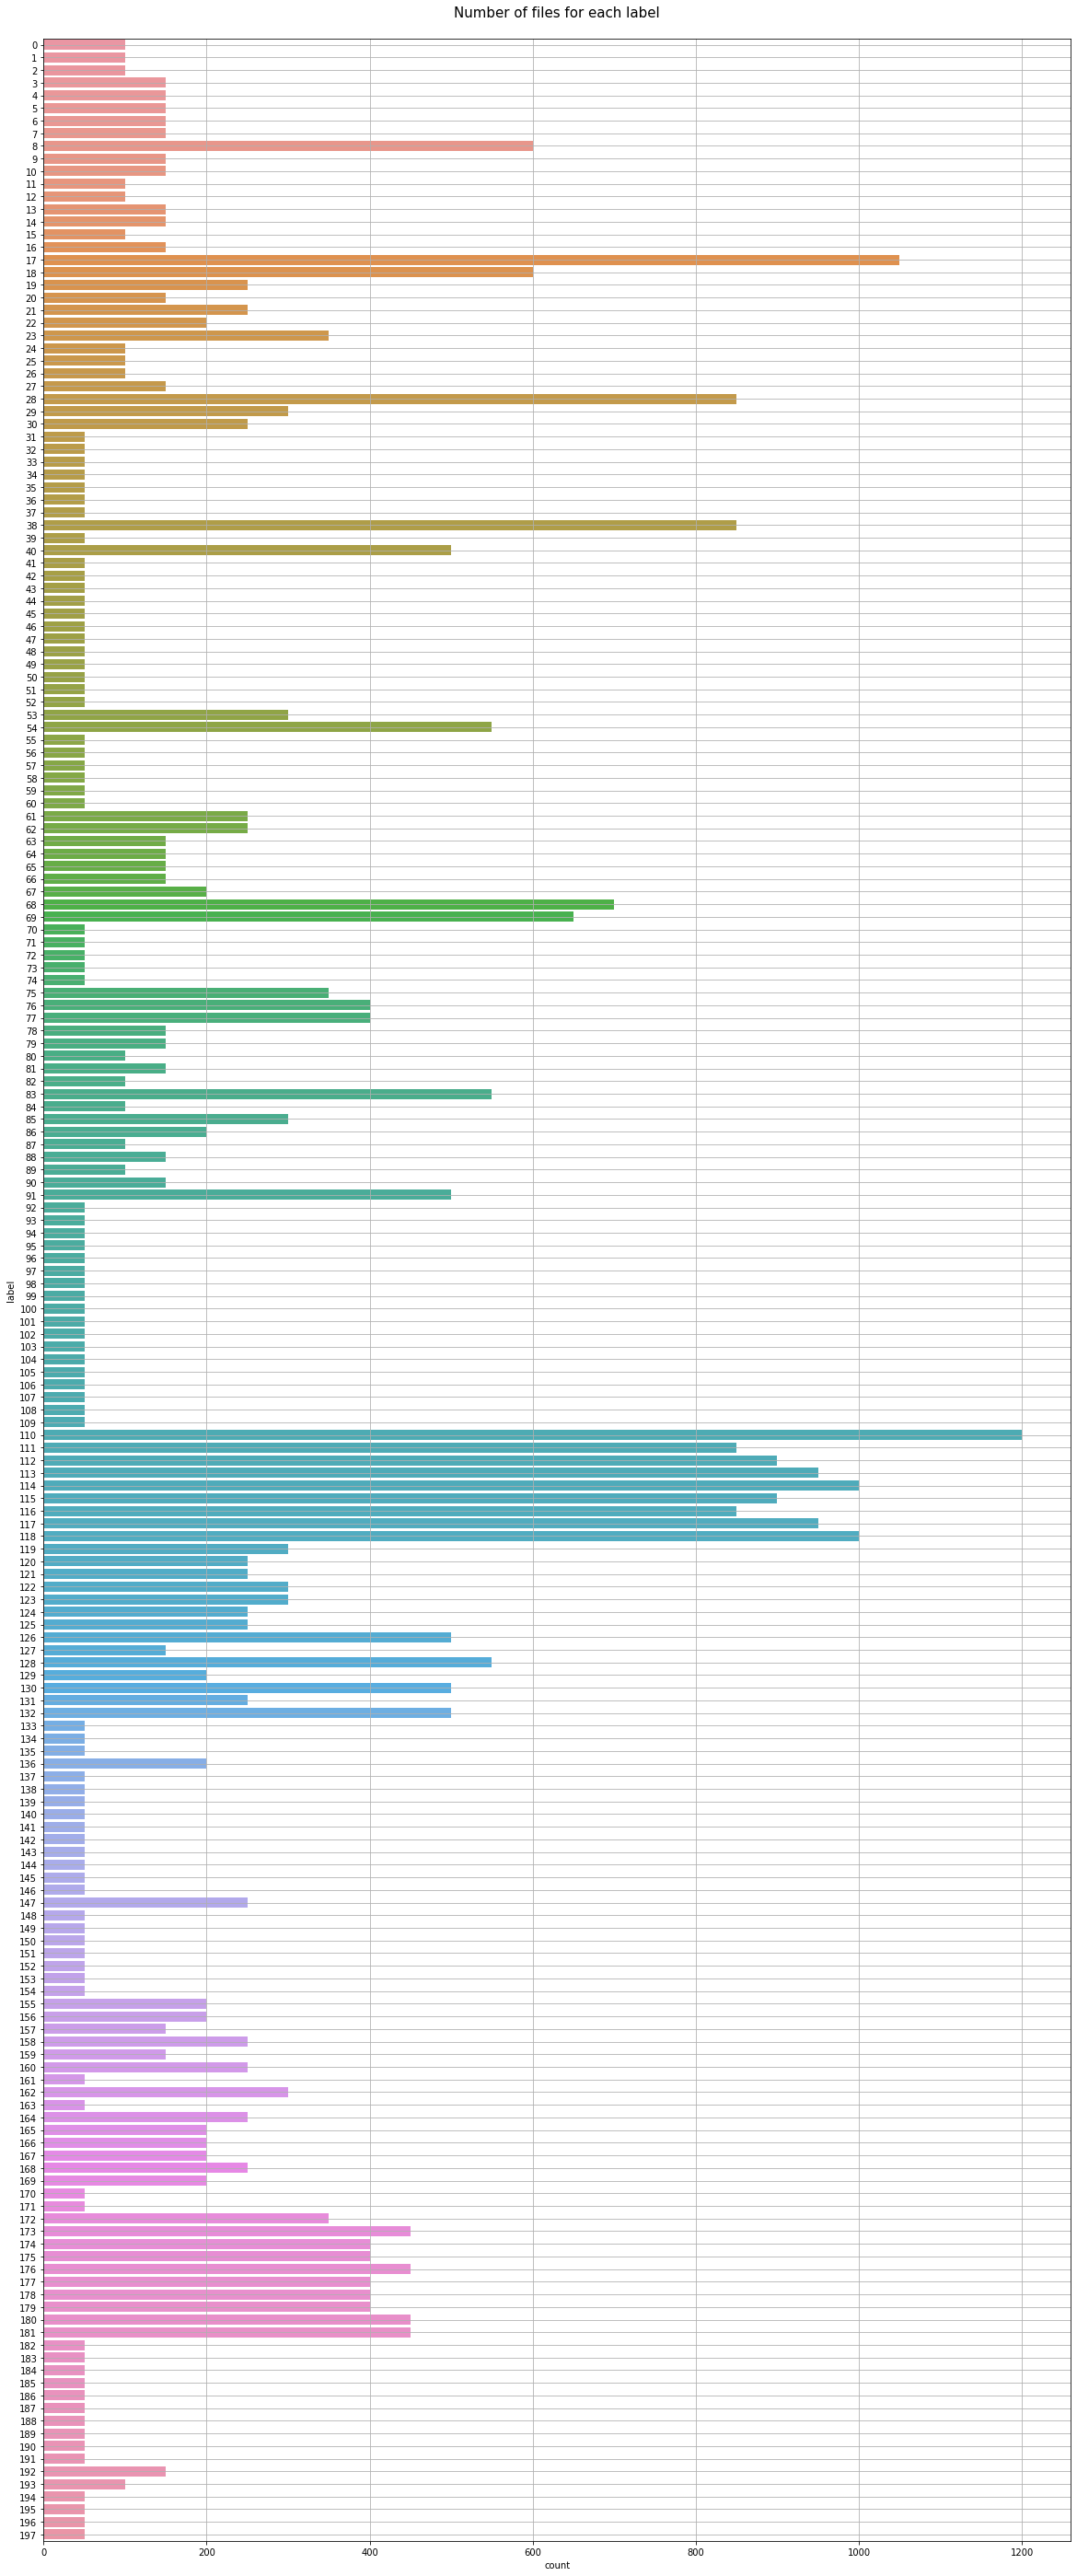

In [24]:
plt.figure(figsize=(20, 50))
sns.countplot(y=y_train)

plt.title('Number of files for each label\n', size=15)
plt.grid()

plt.show()

In [ ]:
# label 별 1개의 파일
# 해당 파일이 대푯값을 가질 수 있을지.. -> 분산분석 필요
sample_list = list(train_label.drop_duplicates().index)
train_list = [f'{i}.csv' for i in sample_list]

In [2]:
import os
import pandas as pd 
import numpy as np
import joblib 

In [3]:
train = np.load('train.npz')

In [4]:
X = train['X']
y = train['y']

In [6]:
X.shape

(36630, 3365)

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import lightgbm as lgbm

In [ ]:
#목적함수 생성
def lgbm_cv(learning_rate, n_estimators, num_leaves, feature_fraction, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
    model = lgbm.LGBMClassifier(learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                num_leaves = int(round(lgbmBO.max['params']['num_leaves'])),
                                feature_fraction = max(min(feature_fraction, 1), 0),
                                bagging_fraction = max(min(bagging_fraction, 1), 0),
                                max_depth = int(round(max_depth)),
                                lambda_l1 = max(lambda_l1, 0),
                                lambda_l2 = max(lambda_l2, 0),
                                min_split_gain = min_split_gain,
                                min_child_weight = min_child_weight)
    RMSE = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    return -RMSE

In [ ]:
# 입력값의 탐색 대상 구간
pbounds = {'learning_rate' : (0.01, 0.3),
           'n_estimators' : (50, 1000),
           'num_leaves': (24, 45),
           'feature_fraction': (0.1, 0.9),
           'bagging_fraction': (0.8, 1),
           'max_depth': (5, 8.99),
           'lambda_l1': (0, 5),
           'lambda_l2': (0, 3),
           'min_split_gain': (0.001, 0.1),
           'min_child_weight': (5, 50)
          }

In [ ]:
#객체 생성
lgbmBO = BayesianOptimization(f = lgbm_cv,pbounds = pbounds, verbose = 2, random_state = 1 )

In [ ]:
# 반복적으로 베이지안 최적화 수행
# acq='ei'사용
# xi=0.01 로 exploration의 강도를 조금 높임
lgbmBO.maximize(init_points=4, n_iter = 16, acq='ei', xi=0.01)

In [ ]:
lgbmBO.max # 찾은 파라미터 값 확인

In [ ]:
#파라미터 적용
fit_lgbm = lgbm.LGBMClassifier(learning_rate=lgbmBO.max['params']['learning_rate'],
                               n_estimators=int(lgbmBO.max['params']['n_estimators']),
                               num_leaves = int(round(lgbmBO.max['params']['num_leaves'])),
                               feature_fraction = max(min(lgbmBO.max['params']['feature_fraction'], 1), 0),
                               bagging_fraction = max(min(lgbmBO.max['params']['bagging_fraction'], 1), 0),
                               max_depth = int(round(lgbmBO.max['params']['max_depth'])),
                               lambda_l1 = max(lgbmBO.max['params']['lambda_l1'], 0),
                               lambda_l2 = max(lgbmBO.max['params']['lambda_l2'], 0),
                               min_split_gain = lgbmBO.max['params']['min_split_gaine'],
                               min_child_weight = lgbmBO.max['params']['min_split_gain'])

In [ ]:
model_lgbm  = fit_lgbm.fit(X,y)

In [ ]:
joblib.dump(model_lgbm, 'model.pkl')

In [ ]:
pred = model_lgbm.predict_proba(test)